Visualize Progress of Embedding on Validation set over the training process

Classification use validate as training set and test as test

Use Supervised learning on extracted vectors 
k-NN or simple NN

User Unsupervised learning on extracted vectors
hierarchical clustering or AE

Which classes are most confounded? Is there a pattern to it? How is it reflected in the visualizations?
Show some MisIDed examples

In [1]:
import glob
import os 
os.chdir("plankton_siamese")
import testing as t
from keras.models import load_model
#glob.glob("test/*")

### Testing triplet_generator ###
0 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
1 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
2 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
3 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)


Using TensorFlow backend.


In [3]:
import numpy as np
# Convert Dict of vectors into array
#model = load_model("models/epoch_20.model")
#image_vectors = t.get_vectors(model, tdir = "data/validate/")
vecs = np.zeros((1,64))
y_truth = []
conv_dict = {}
keys = list(image_vectors.keys())
for i in range(len(keys)):
    conv_dict[keys[i]] = i
for c in image_vectors:
    print(c)
    vecs = np.append(vecs,np.array(image_vectors[c]).reshape(100,64), axis = 0)
    y_truth.append([c]*100)
vecs = np.delete(vecs,0,0)
y_truth = [item for sublist in y_truth for item in sublist]

tail__Chaetognatha
Coscinodiscus
Limacinidae
Phaeodaria
calyptopsis
nectophore__Diphyidae
Foraminifera
Oikopleuridae
Annelida
Ostracoda
nauplii__Crustacea
Noctiluca
Cavoliniidae
Haloptilus
Harpacticoida
Salpida
egg__other
zoea__Decapoda
cyphonaute
Euchaetidae
Penilia
Evadne
Decapoda
multiple__Copepoda
Corycaeidae
Candaciidae
Doliolida
Oncaeidae
Brachyura
nauplii__Cirripedia
egg__Actinopterygii
Eucalanidae
gonophore__Diphyidae
Temoridae
tail__Appendicularia
Fritillariidae
Bivalvia__Mollusca
Centropagidae
eudoxie__Diphyidae
multiple__other


In [8]:
model = load_model("Base_model.model")
image_vectors = t.get_vectors(model, tdir = "validate/")
#model = model.load_weights("models/epoch_1.h5")
#model.predict()

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
#model = load_model("Base_model.model")
models = glob.glob('models/*')
vec_hist = []
imdir = "validate/"
for m in models:
    model = load_model(m) # Switch to load weights
    image_vectors = t.get_vectors(model, tdir = imdir)
    # Begin fn for dict to array convert
    vecs = np.zeros((1,64))
    y_truth = []
    conv_dict = {}
    keys = list(image_vectors.keys())
    for i in range(len(keys)):
        conv_dict[keys[i]] = i
    for c in image_vectors:
        print(c)
        vecs = np.append(vecs,np.array(image_vectors[c]).reshape(100,64), axis = 0)
        y_truth.append([c]*100)
    # End fn dict to array
    
    # T-SNE for Visualization
    
    vec_hist.append(np.delete(vecs,0,0))
    y_truth = [item for sublist in y_truth for item in sublist]
        

AttributeError: 'NoneType' object has no attribute 'predict'

In [113]:
len(vec_hist)

0

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

In [6]:
pca_5 = PCA(n_components=50)
pca_result_5 = pca_5.fit_transform(vecs)
print('Cumulative explained variation for 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))
print(np.shape(pca_result_5))

    
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(pca_result_5)

Cumulative explained variation for 5 principal components: 0.999999800333902
(4000, 50)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.044s...
[t-SNE] Computed neighbors for 4000 samples in 0.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.035125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.429333
[t-SNE] KL divergence after 3000 iterations: 0.644003


In [7]:
tsne_result = tsne.fit_transform(vecs)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.009s...
[t-SNE] Computed neighbors for 4000 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.035127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.276077
[t-SNE] KL divergence after 3000 iterations: 0.635888


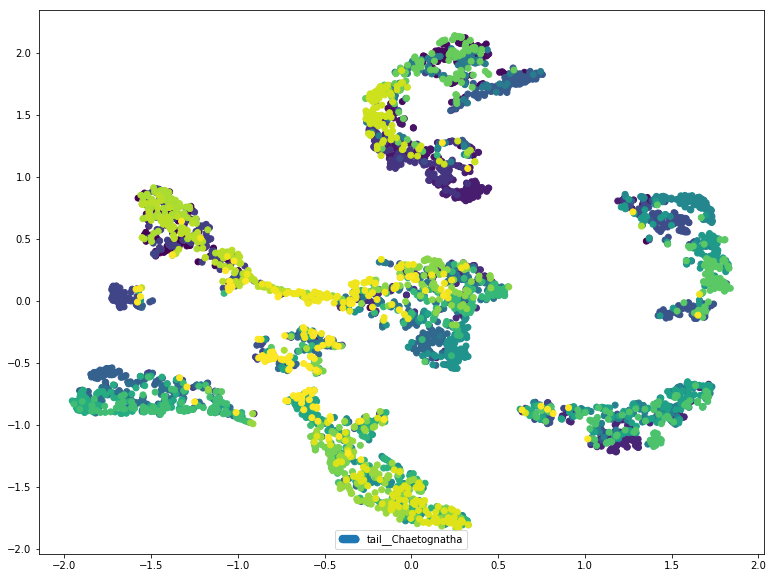

In [30]:
plt.figure(figsize=(13, 10))
plt.scatter(tsne_result_scaled[:,0], tsne_result_scaled[:,1], c = [conv_dict[i] for i in y_truth], label = list(conv_dict.keys()))
plt.legend(list(conv_dict.keys()),loc = "lower center", scatterpoints = 40)

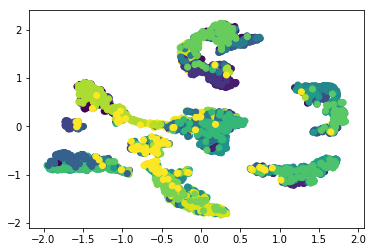

In [76]:
#list(conv_dict.keys())
#y_truth
from matplotlib import cm
viridis = cm.get_cmap('viridis', 40)
colors = [item for sublist in [[list(i)]*100 for i in viridis.colors] for item in sublist]
for (i,cla) in enumerate(set(y_truth)):
    #print(i,"and",cla)
    xc = [p for (j,p) in enumerate(tsne_result_scaled[:,0]) if y_truth[j]==cla]
    yc = [p for (j,p) in enumerate(tsne_result_scaled[:,1]) if y_truth[j]==cla]
    cols = [c for (j,c) in enumerate(colors) if y_truth[j]==cla]
    plt.scatter(xc,yc,c=cols,label=cla)
plt.legend(loc=-1, ncol = 3)

#[conv_dict[i] for i in y_truth]
#plt.scatter(pca_result_5[:,0], pca_result_5[:,1], c = [conv_dict[i] for i in y_truth])

In [78]:
import scipy.cluster.hierarchy as shc

#plt.figure(figsize=(10, 7))  
#dend = shc.dendrogram(shc.linkage(vecs, method='ward'))

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')  
y_pred = cluster.fit_predict(vecs)  

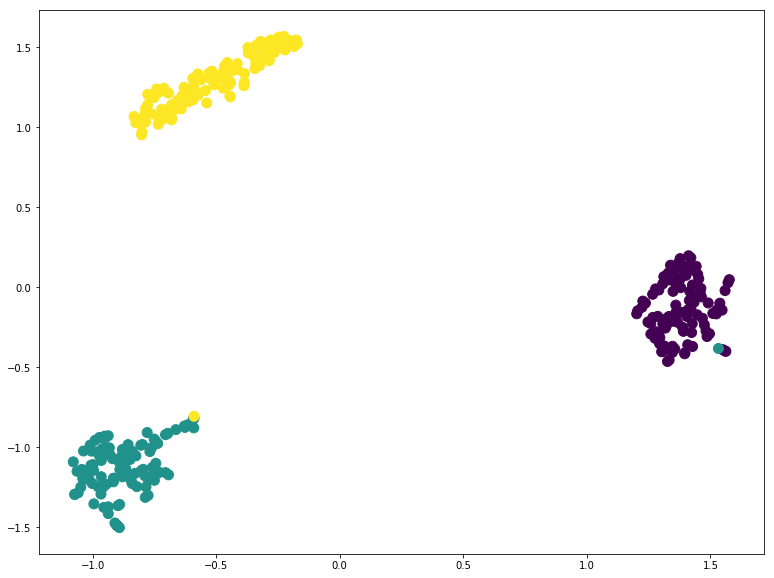

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main(res):
    numframes = res.shape[0]
    color_data = [conv_dict[i] for i in y_truth]
    xy_data = res

    fig = plt.figure(figsize=(13, 10))
    scat = plt.scatter(res[0,:,0], res[0,:,1], c=color_data, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(scat, xy_data))

    return(ani)

def update_plot(i, scat, xy):
    scat.set_offsets(xy[i])
    return scat,

ani = main(res = res)
HTML(ani.to_html5_video())

In [84]:
from testing import centroid
from testing import knn_test
#centroid(image_vectors['Annelida'])
knn_test(model, "validate", "test", k=5)


14

In [19]:
def move_and_split_data_set(path):
    import glob
    import re
    import os
    from random import shuffle
    import shutil
    classes = glob.glob(path + "*")
    classes = [re.search(path + "(.*)", classes[i]).group(1) for i in range(len(classes))]
    folders = ["test", "validate", "train"]
    for i in folders:
        if i in classes: classes.remove(i)
    print("Number of classes: ",len(classes))
    for i in folders:
        print("Creating ",i,"-set")
        if not os.path.isdir(path + i):
            os.mkdir(path + i)
            
        for c in classes:
            print("Moving files: ", c)
            if not os.path.isdir(path + i + "/" + c):
                os.mkdir(path + i + "/" + c)
            files = glob.glob(path + c + "/*")
            shuffle(files)
            if i == "train":
                for f in files:
                    #print("moving train files: ",c)
                    shutil.move(f, path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1) )
                    # end for files
            else:
                for f in files[0:90]:
                    #print("moving test/val files: ",c)
                    shutil.move(f, path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1) )
                    #end for files
    print("Removing Old class folders")
    for c in classes:
        os.rmdir(path + c)
    return classes

#fetch_data_set("Ex3/plankton_siamese/Euc/")

In [20]:
classes = move_and_split_data_set("data/")

Number of classes:  40
Creating  test -set
Moving files:  Brachyura
Moving files:  tail__Chaetognatha
Moving files:  Eucalanidae
Moving files:  nauplii__Crustacea
Moving files:  Cavoliniidae
Moving files:  egg__other
Moving files:  multiple__Copepoda
Moving files:  Bivalvia__Mollusca
Moving files:  Phaeodaria
Moving files:  Ostracoda
Moving files:  Penilia
Moving files:  Limacinidae
Moving files:  Oikopleuridae
Moving files:  nectophore__Diphyidae
Moving files:  Corycaeidae
Moving files:  Temoridae
Moving files:  egg__Actinopterygii
Moving files:  Foraminifera
Moving files:  Annelida
Moving files:  eudoxie__Diphyidae
Moving files:  Oncaeidae
Moving files:  Noctiluca
Moving files:  Doliolida
Moving files:  Decapoda
Moving files:  nauplii__Cirripedia
Moving files:  tail__Appendicularia
Moving files:  Haloptilus
Moving files:  Candaciidae
Moving files:  cyphonaute
Moving files:  Euchaetidae
Moving files:  multiple__other
Moving files:  Harpacticoida
Moving files:  Evadne
Moving files:  Co

In [45]:
l = ["c","a","d","b"]
for i in ["a","b"]:
    if i in l: l.remove(i) 
l

['c', 'd']

In [12]:
os.getcwd()

'/home/florianmuthreich/INF368/Ex3/plankton_siamese'